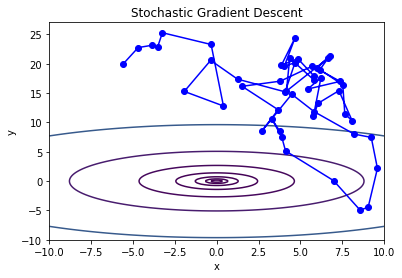

In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define the target function to optimize (a simple quadratic bowl)
def target_function(x, y):
    return x**2 + 3*y**2

# Define the gradient of the target function
def gradient(x, y):
    return np.array([2*x, 6*y])

# Define the SGD algorithm
def stochastic_gradient_descent(initial_point, learning_rate, num_iterations, batch_size):
    x, y = initial_point
    history = []
    for i in range(num_iterations):
        # Randomly select a batch of data points
        batch = [(random.uniform(-5, 5), random.uniform(-5, 5)) for _ in range(batch_size)]
        # Compute the average gradient of the batch
        avg_gradient = np.array([0.0, 0.0])
        for point in batch:
            avg_gradient += gradient(point[0], point[1])
        avg_gradient /= batch_size
        # Update the parameters using the gradient
        x -= learning_rate * avg_gradient[0]
        y -= learning_rate * avg_gradient[1]
        # Record the current point
        history.append((x, y))
    return history

# Set the hyperparameters
initial_point = (5, 3)
learning_rate = 1
num_iterations = 50
batch_size = 20

# Run SGD to optimize the target function
history = stochastic_gradient_descent(initial_point, learning_rate, num_iterations, batch_size)

# Plot the history of the optimization process
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = target_function(X, Y)
plt.contour(X, Y, Z, levels=np.logspace(-2, 3, 10))
plt.plot([point[0] for point in history], [point[1] for point in history], 'bo-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stochastic Gradient Descent')
plt.show()
